In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import sys
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk import stem
import seaborn as sns
import numpy as np
import nltk
from nltk import word_tokenize, pos_tag
import string
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from spacy.cli.download import download
download(model="en_core_web_sm")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\49178\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
url = 'https://budapestbeacon.com/viktor-orbans-campaign-speech-of-29-march-2014/'
url2 = 'https://2015-2019.kormany.hu/en/the-prime-minister/the-prime-minister-s-speeches/prime-minister-viktor-orban-s-presentation-at-the-26th-balvanyos-summer-open-university-and-student-camp'
url3 = 'https://2015-2019.kormany.hu/en/the-prime-minister/the-prime-minister-s-speeches/orban-viktor-s-ceremonial-speech-on-the-170th-anniversary-of-the-hungarian-revolution-of-1848'
url4="https://2015-2019.kormany.hu/en/the-prime-minister/the-prime-minister-s-speeches/prime-minister-viktor-orban-s-speech-at-the-27th-congress-of-fidesz-hungarian-civic-union"
url5='https://2015-2019.kormany.hu/en/the-prime-minister/the-prime-minister-s-speeches/viktor-orban-s-speech-at-the-visegrad-group-conference-the-future-of-europe'
url6='https://2015-2019.kormany.hu/en/the-prime-minister/the-prime-minister-s-speeches/prime-minister-viktor-orban-s-speech-at-the-final-fidesz-election-campaign-event'
url7='https://2015-2019.kormany.hu/en/the-prime-minister/the-prime-minister-s-speeches/prime-minister-viktor-orban-s-address-after-swearing-the-prime-ministerial-oath-of-office'
url8='https://2015-2019.kormany.hu/en/the-prime-minister/the-prime-minister-s-speeches/prime-minister-viktor-orban-s-speech-at-the-year-opening-event-of-the-hungarian-chamber-of-commerce-and-industry'
url9='https://2015-2019.kormany.hu/en/the-prime-minister/the-prime-minister-s-speeches/prime-minister-viktor-orban-s-speech-at-christian-democrat-international-s-conference-on-interfaith-dialogue'
url10='https://2015-2019.kormany.hu/en/the-prime-minister/the-prime-minister-s-speeches/prime-minister-viktor-orban-s-speech-at-the-annual-general-meeting-of-the-association-of-cities-with-county-rights'
url11='https://2015-2019.kormany.hu/en/the-prime-minister/the-prime-minister-s-speeches/viktor-orban-s-speech-at-the-14th-kotcse-civil-picnic'


In [3]:
#creating a list of all the urls ,exclude the first url from here as it uses different website 
urls = [
    url2, 
    url3, 
    url4, 
    url5, 
    url6, 
    url7, 
    url8, 
    url9, 
    url10, 
    url11
]


In [4]:
#create a response for the url
response = requests.get(url).text
soup = BeautifulSoup(response, "html.parser")
cm=soup.find_all(attrs={'class':"post-template-default single single-post postid-6284 single-format-standard responsive-menu-slide-left"})
speech1=cm[0].find_all('div', attrs={'class':'grid__col-md-8 content-area'})
type(speech1[0]),

(bs4.element.Tag,)

In [5]:
clean_speech1=speech1[0].get_text()                           #clean the first transcript-speech1
clean_speech1 = clean_speech1.replace("\n", "")
len(clean_speech1)

9561

In [6]:
#list of responses
responses = []
for url in urls:
    response = requests.get(url).text
    responses.append(response) 
    

In [7]:
# list of soups()
soups=[]
for response in responses:
    soup = BeautifulSoup(response, "html.parser")
    soups.append(soup)

In [8]:
#creating a list of transcripts
speeches=[]
for soup in soups:
    speech=soup.find_all(attrs={'class':'Eng Inner Article Theme-Parliament'})
    speech=speech[0].find_all('div', attrs={'class':'article-content'})
    speeches.append(speech)
    time.sleep(1)

In [9]:
#clean the transcripts of speeches 
cleaned_speeches=[]
for speech in speeches:
    clean_speech=speech[0].get_text()
    clean_speech = clean_speech.replace("\n", "")
    clean_speech = clean_speech.replace('^(.*?)[.?!]\s', '')
    cleaned_speeches.append(clean_speech)
cleaned_speeches[1]

'15 March 2018, Budapest\t\t\t\t\t\t\tI welcome you all on Hungary’s celebration of freedom! I greet those taking part in the Peace March. It is with special esteem that I greet our Polish friends. Our closeness is natural, and our embrace is a source of strength. In the time of our forefather Kossuth, it was written that “Hungary and Poland are two imperishable oaks which have grown two separate trunks, but whose roots have intertwined. Therefore the existence and strength of one is the precondition for the life and health of the other”. It is no different today: if Poland is strong, then Hungary cannot be lost; if we are strong, we can help our Polish friends. Therefore the Peace March is not simply a rally for the cause of our country, but also a stand we take alongside Poland. Honour to Poland! Honour to Hungary!Once again, Fellow Celebrants, the day has come which lifts the heart of every Hungarian. The day on which, in the great book of world history, a word was written in the Hu

In [10]:
#put the the collected data in a dataframe
data = {'speeches':  [clean_speech1, cleaned_speeches[0], cleaned_speeches[1],cleaned_speeches[2],cleaned_speeches[3],
                      cleaned_speeches[4],cleaned_speeches[5],cleaned_speeches[6],cleaned_speeches[7],cleaned_speeches[8],
                      cleaned_speeches[9]],
        'title': ["campaign speech ","presentation at the 26th Bálványos Summer Open University and Student Camp","Orbán Viktor’s ceremonial speech on the 170th anniversary of the Hungarian Revolution of 1848",
                 "speech at the 27th Congress of Fidesz – Hungarian Civic Union ","speech at the Visegrád Group conference “The Future of Europe","speech at the final Fidesz election campaign event",
                  "address after swearing the prime-ministerial oath of office","speech at the year opening event of the Hungarian Chamber of Commerce and Industry","Speech at Christian Democrat International’s conference on interfaith dialogue",
                 "speech at the annual general meeting of the Association of Cities with County Rights",
                 "speech at the 14th Kötcse civil picnic "],
        'date':['2014-03-29','2015-07-25','2018-03-15','2017-11-12','2018-01-26','2018-04-06', '2018-05-10','2018-03-06','2018-02-16', '2018-01-08' , '2015-09-05', ],
        'location' :["Budapest's Heroes Square", "Tusnádfürdő (Băile Tuşnad)","Budapest","Budapest", "Budapest", "Székesfehérvár","Budapest", "Budapest" , "Budapest", "Veszprém", "Kötcse" ]
        
      
        }

df = pd.DataFrame (data, columns = ['speeches','title','date','location'])
df

,speeches,title,date,location
0,"“Together,” Orban said, “we have transformed a...",campaign speech,2014-03-29,Budapest's Heroes Square
1,"25 July 2015, Tusnádfürdő (Băile Tuşnad)\t\t\t...",presentation at the 26th Bálványos Summer Open...,2015-07-25,Tusnádfürdő (Băile Tuşnad)
2,"15 March 2018, Budapest\t\t\t\t\t\t\tI welcome...",Orbán Viktor’s ceremonial speech on the 170th ...,2018-03-15,Budapest
3,"12 November 2017, Budapest\t\t\t\t\t\t\tDear F...",speech at the 27th Congress of Fidesz – Hungar...,2017-11-12,Budapest
4,"Budapest, 26 January 2018\t\t\t\t\t\t\tGood da...",speech at the Visegrád Group conference “The F...,2018-01-26,Budapest
5,"6 April 2018, Székesfehérvár\t\t\t\t\t\t\tLadi...",speech at the final Fidesz election campaign e...,2018-04-06,Székesfehérvár
6,"Budapest, 10 May 2018\t\t\t\t\t\t\tHonourable ...",address after swearing the prime-ministerial o...,2018-05-10,Budapest
7,"6 March 2018, Budapest \t\t\t\t\t\t\tGood morn...",speech at the year opening event of the Hungar...,2018-03-06,Budapest
8,"16 February 2018, Budapest\t\t\t\t\t\t\tA resp...",Speech at Christian Democrat International’s c...,2018-02-16,Budapest
9,"8 February 2018, Veszprém\t\t\t\t\t\t\tGood mo...",speech at the annual general meeting of the As...,2018-01-08,Veszprém


In [11]:
#saving df
pickle.dump(df, open('df.pkl',"wb"))
#reading saved df
df=pd.read_pickle('df.pkl')
df

,speeches,title,date,location
0,"“Together,” Orban said, “we have transformed a...",campaign speech,2014-03-29,Budapest's Heroes Square
1,"25 July 2015, Tusnádfürdő (Băile Tuşnad)\t\t\t...",presentation at the 26th Bálványos Summer Open...,2015-07-25,Tusnádfürdő (Băile Tuşnad)
2,"15 March 2018, Budapest\t\t\t\t\t\t\tI welcome...",Orbán Viktor’s ceremonial speech on the 170th ...,2018-03-15,Budapest
3,"12 November 2017, Budapest\t\t\t\t\t\t\tDear F...",speech at the 27th Congress of Fidesz – Hungar...,2017-11-12,Budapest
4,"Budapest, 26 January 2018\t\t\t\t\t\t\tGood da...",speech at the Visegrád Group conference “The F...,2018-01-26,Budapest
5,"6 April 2018, Székesfehérvár\t\t\t\t\t\t\tLadi...",speech at the final Fidesz election campaign e...,2018-04-06,Székesfehérvár
6,"Budapest, 10 May 2018\t\t\t\t\t\t\tHonourable ...",address after swearing the prime-ministerial o...,2018-05-10,Budapest
7,"6 March 2018, Budapest \t\t\t\t\t\t\tGood morn...",speech at the year opening event of the Hungar...,2018-03-06,Budapest
8,"16 February 2018, Budapest\t\t\t\t\t\t\tA resp...",Speech at Christian Democrat International’s c...,2018-02-16,Budapest
9,"8 February 2018, Veszprém\t\t\t\t\t\t\tGood mo...",speech at the annual general meeting of the As...,2018-01-08,Veszprém


### Sentiment analysis before the lemmitazation

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer =SentimentIntensityAnalyzer() #define the model

In [13]:
initial_sentiment_speech1=analyzer.polarity_scores(clean_speech1)  #making a sentiment analysis of the very first speech
initial_sentiment_speech1

{'neg': 0.058, 'neu': 0.77, 'pos': 0.173, 'compound': 0.9997}

In [14]:
#sentiments of speeches (starting from second to the last speech )
speeches_initial_sentiments=[]
for sentiment in cleaned_speeches:
    initial_sentiment=analyzer.polarity_scores(sentiment)
    speeches_initial_sentiments.append(initial_sentiment)
    time.sleep(1)
    print(initial_sentiment)

{'neg': 0.099, 'neu': 0.78, 'pos': 0.121, 'compound': 0.9972}
{'neg': 0.082, 'neu': 0.788, 'pos': 0.13, 'compound': 0.9996}
{'neg': 0.056, 'neu': 0.773, 'pos': 0.171, 'compound': 1.0}
{'neg': 0.052, 'neu': 0.838, 'pos': 0.11, 'compound': 0.9985}
{'neg': 0.075, 'neu': 0.797, 'pos': 0.127, 'compound': 0.9993}
{'neg': 0.056, 'neu': 0.767, 'pos': 0.177, 'compound': 1.0}
{'neg': 0.047, 'neu': 0.814, 'pos': 0.139, 'compound': 1.0}
{'neg': 0.061, 'neu': 0.822, 'pos': 0.116, 'compound': 0.9996}
{'neg': 0.067, 'neu': 0.802, 'pos': 0.131, 'compound': 0.9999}
{'neg': 0.084, 'neu': 0.796, 'pos': 0.12, 'compound': 0.9997}


### Textblob

In [15]:
df_temp=df   #save a dataset in a new variable 
df_temp.set_index('title', inplace=True)  #index the columns of title
df_temp### Textblob display

,speeches,date,location
title,,,
campaign speech,"“Together,” Orban said, “we have transformed a...",2014-03-29,Budapest's Heroes Square
presentation at the 26th Bálványos Summer Open University and Student Camp,"25 July 2015, Tusnádfürdő (Băile Tuşnad)\t\t\t...",2015-07-25,Tusnádfürdő (Băile Tuşnad)
Orbán Viktor’s ceremonial speech on the 170th anniversary of the Hungarian Revolution of 1848,"15 March 2018, Budapest\t\t\t\t\t\t\tI welcome...",2018-03-15,Budapest
speech at the 27th Congress of Fidesz – Hungarian Civic Union,"12 November 2017, Budapest\t\t\t\t\t\t\tDear F...",2017-11-12,Budapest
speech at the Visegrád Group conference “The Future of Europe,"Budapest, 26 January 2018\t\t\t\t\t\t\tGood da...",2018-01-26,Budapest
speech at the final Fidesz election campaign event,"6 April 2018, Székesfehérvár\t\t\t\t\t\t\tLadi...",2018-04-06,Székesfehérvár
address after swearing the prime-ministerial oath of office,"Budapest, 10 May 2018\t\t\t\t\t\t\tHonourable ...",2018-05-10,Budapest
speech at the year opening event of the Hungarian Chamber of Commerce and Industry,"6 March 2018, Budapest \t\t\t\t\t\t\tGood morn...",2018-03-06,Budapest
Speech at Christian Democrat International’s conference on interfaith dialogue,"16 February 2018, Budapest\t\t\t\t\t\t\tA resp...",2018-02-16,Budapest


In [16]:
#applying polarity and subjectivity functions
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_temp['polarity'] = df_temp['speeches'].apply(pol)
df_temp['subjectivity'] = df_temp['speeches'].apply(sub)
df_temp

,speeches,date,location,polarity,subjectivity
title,,,,,
campaign speech,"“Together,” Orban said, “we have transformed a...",2014-03-29,Budapest's Heroes Square,0.187447,0.514657
presentation at the 26th Bálványos Summer Open University and Student Camp,"25 July 2015, Tusnádfürdő (Băile Tuşnad)\t\t\t...",2015-07-25,Tusnádfürdő (Băile Tuşnad),0.109919,0.435410
Orbán Viktor’s ceremonial speech on the 170th anniversary of the Hungarian Revolution of 1848,"15 March 2018, Budapest\t\t\t\t\t\t\tI welcome...",2018-03-15,Budapest,0.120916,0.469375
speech at the 27th Congress of Fidesz – Hungarian Civic Union,"12 November 2017, Budapest\t\t\t\t\t\t\tDear F...",2017-11-12,Budapest,0.141278,0.457489
speech at the Visegrád Group conference “The Future of Europe,"Budapest, 26 January 2018\t\t\t\t\t\t\tGood da...",2018-01-26,Budapest,0.134244,0.419913
speech at the final Fidesz election campaign event,"6 April 2018, Székesfehérvár\t\t\t\t\t\t\tLadi...",2018-04-06,Székesfehérvár,0.143258,0.436361
address after swearing the prime-ministerial oath of office,"Budapest, 10 May 2018\t\t\t\t\t\t\tHonourable ...",2018-05-10,Budapest,0.126832,0.464959
speech at the year opening event of the Hungarian Chamber of Commerce and Industry,"6 March 2018, Budapest \t\t\t\t\t\t\tGood morn...",2018-03-06,Budapest,0.128884,0.438743
Speech at Christian Democrat International’s conference on interfaith dialogue,"16 February 2018, Budapest\t\t\t\t\t\t\tA resp...",2018-02-16,Budapest,0.100391,0.399991


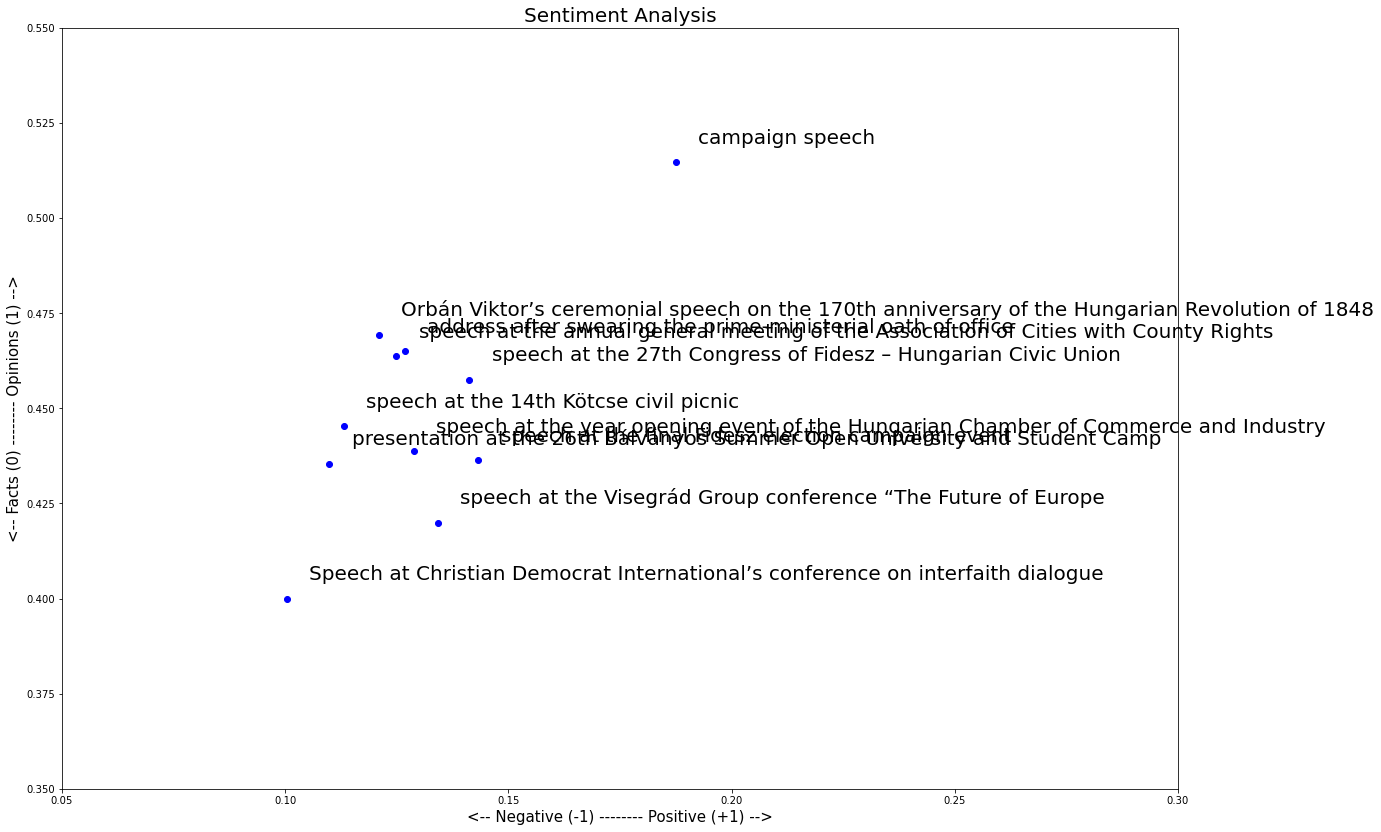

<Figure size 1440x1008 with 0 Axes>

In [17]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 14]

for index, name in enumerate(df_temp.index):
    x = df_temp.polarity.loc[name]
    y = df_temp.subjectivity.loc[name]
    plt.scatter(x, y, color='blue')
    plt.text(x+.005, y+.005,name, fontsize=20)
    plt.xlim(0.05, 0.30) 
    plt.ylim(0.35, 0.55) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative (-1) -------- Positive (+1) -->', fontsize=15)
plt.ylabel('<-- Facts (0) -------- Opinions (1) -->', fontsize=15)

plt.show()


In [60]:
plt.savefig('save_as_a_png1.png')

<Figure size 1440x1008 with 0 Axes>

In [18]:
#loading df
df_temp=pd.read_pickle('df_temp.pkl')

### Cleaning the speeches and creating a wordcloud

In [19]:
#loading df
pd.read_pickle('df.pkl')

,speeches,title,date,location
0,"“Together,” Orban said, “we have transformed a...",campaign speech,2014-03-29,Budapest's Heroes Square
1,"25 July 2015, Tusnádfürdő (Băile Tuşnad)\t\t\t...",presentation at the 26th Bálványos Summer Open...,2015-07-25,Tusnádfürdő (Băile Tuşnad)
2,"15 March 2018, Budapest\t\t\t\t\t\t\tI welcome...",Orbán Viktor’s ceremonial speech on the 170th ...,2018-03-15,Budapest
3,"12 November 2017, Budapest\t\t\t\t\t\t\tDear F...",speech at the 27th Congress of Fidesz – Hungar...,2017-11-12,Budapest
4,"Budapest, 26 January 2018\t\t\t\t\t\t\tGood da...",speech at the Visegrád Group conference “The F...,2018-01-26,Budapest
5,"6 April 2018, Székesfehérvár\t\t\t\t\t\t\tLadi...",speech at the final Fidesz election campaign e...,2018-04-06,Székesfehérvár
6,"Budapest, 10 May 2018\t\t\t\t\t\t\tHonourable ...",address after swearing the prime-ministerial o...,2018-05-10,Budapest
7,"6 March 2018, Budapest \t\t\t\t\t\t\tGood morn...",speech at the year opening event of the Hungar...,2018-03-06,Budapest
8,"16 February 2018, Budapest\t\t\t\t\t\t\tA resp...",Speech at Christian Democrat International’s c...,2018-02-16,Budapest
9,"8 February 2018, Veszprém\t\t\t\t\t\t\tGood mo...",speech at the annual general meeting of the As...,2018-01-08,Veszprém


In [20]:
# text cleaning before wordcloud
def clean_speeches(speeches):
    '''Remove @, RT, links and apostrophe'''
    speeches = re.sub("@[^\s]+[\s]?", '', speeches)   
    speeches = re.sub('http\S+[\s]?', '', speeches)
    speeches = re.sub('RT+[\s]?', '', speeches)
    speeches = re.sub("'s", "", speeches) 
    speeches = re.sub("’s", "", speeches)  
    return speeches
cleaner = lambda x: clean_speeches(x)

In [21]:
df['speeches'] = df['speeches'].apply(cleaner)

In [22]:
# Extract the plain text content of the page
text = df['speeches']
mask = np.zeros((500, 500, 3), np.uint8)
mask[150:350,150:350,:] = 255  # masked out area

In [23]:
# cleaned string takes the pandas series object and turns it into a python list, 
# then "join" it into a long single string for the word cloud
cleaned_string = text.tolist()
cleaned_string = ' '.join(cleaned_string)

"“Together,” Orban said, “we have transformed and renewed the country. Together we have modernized and streamlined the country. We have turned our broken down, stalling, flat-tired vehicle into a fool-proof, fast, and valiant race car. Teetering on the verge of bankruptcy, with no self-respect and no confidence, our country in decline was transformed into a nation that grows stronger day by day, transformed into a nation which has had its self-respect and confidence restored, a nation worthy of its old glory, a nation standing before a magnificent future.”“It all started when we assembled here 25 years ago. Everything started here. Hungary quest for freedom began here in this square. This is the place where we looked the world in its eyes and declared that we will scorn those who are traitors to our country and that we will scorn those who join the ranks of our foreign occupiers. This is the place where we told the world that never again will we allow them to take away and bury our fut

In [24]:
stop_words = ["will", "us", "now", 'now','see', 'make', 'need', 's', 'kofi','say'] + list(STOPWORDS) 
#clean the transcripts from Stopwords

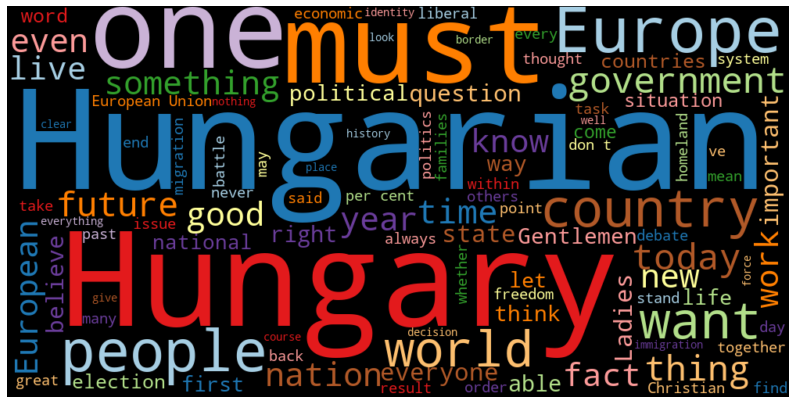

In [25]:
#create a wordcloud
cloud = WordCloud(width=1000, height=500, random_state=1,background_color="black",
                max_words=100,
                contour_color='steelblue',
                  colormap="Paired",
                stopwords=stop_words).generate(cleaned_string)

plt.figure(figsize = (14,10))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('cloud.png')
plt.axis("off")
plt.show()


### Topic Modeling with Gensim 

In [26]:

import nltk; nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
from pprint import pprint
import os

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\49178\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\49178\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


##### Prepare Stopwords

In [27]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject','give', 're', 'edu', 'use', 'like', 'im', 'know', 'just', 'dont', 'thats',  'ladies', 'gentlemen','székesfehérvár','end', 'right',
                  'youre', 'got', 'gonna', 'time', 'think', 'kofi','yeah','year', 'abc', 'said','from', 'subject','to', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 
                   'get', 'do', 'done','orban','try', 'many', 'some','square', 'germany', 'thing', 'nice','thank', 'think', 'see', 'rather', 'lot',
                   'lack', 'make', 'want', 'seem', 'run','a','if','fehérvár','dear','as', 'veszprém','work', 'll', 'don',"don't",'it','need', '56','even',  'line', 've', 'also', 'may', 'take', 
                   ])


##### Clean the data

In [28]:
# Convert to list
data = df.speeches.values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:4])

['“Together,” Orban said, “we have transformed and renewed the country. '
 'Together we have modernized and streamlined the country. We have turned our '
 'broken down, stalling, flat-tired vehicle into a fool-proof, fast, and '
 'valiant race car. Teetering on the verge of bankruptcy, with no self-respect '
 'and no confidence, our country in decline was transformed into a nation that '
 'grows stronger day by day, transformed into a nation which has had its '
 'self-respect and confidence restored, a nation worthy of its old glory, a '
 'nation standing before a magnificent future.”“It all started when we '
 'assembled here 25 years ago. Everything started here. Hungary quest for '
 'freedom began here in this square. This is the place where we looked the '
 'world in its eyes and declared that we will scorn those who are traitors to '
 'our country and that we will scorn those who join the ranks of our foreign '
 'occupiers. This is the place where we told the world that never again

##### Tokenize words and Clean-up text

In [29]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['together', 'orban', 'said', 'we', 'have', 'transformed', 'and', 'renewed', 'the', 'country', 'together', 'we', 'have', 'modernized', 'and', 'streamlined', 'the', 'country', 'we', 'have', 'turned', 'our', 'broken', 'down', 'stalling', 'flat', 'tired', 'vehicle', 'into', 'fool', 'proof', 'fast', 'and', 'valiant', 'race', 'car', 'teetering', 'on', 'the', 'verge', 'of', 'bankruptcy', 'with', 'no', 'self', 'respect', 'and', 'no', 'confidence', 'our', 'country', 'in', 'decline', 'was', 'transformed', 'into', 'nation', 'that', 'grows', 'stronger', 'day', 'by', 'day', 'transformed', 'into', 'nation', 'which', 'has', 'had', 'its', 'self', 'respect', 'and', 'confidence', 'restored', 'nation', 'worthy', 'of', 'its', 'old', 'glory', 'nation', 'standing', 'before', 'magnificent', 'future', 'it', 'all', 'started', 'when', 'we', 'assembled', 'here', 'years', 'ago', 'everything', 'started', 'here', 'hungary', 'quest', 'for', 'freedom', 'began', 'here', 'in', 'this', 'square', 'this', 'is', 'the', '

##### Creating Bigram and Trigram Models
-Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.

In [30]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

['july', 'tusnadfurdo', 'baile', 'tusnad', 'good', 'morning', 'allow', 'me', 'to', 'welcome', 'attendees', 'at', 'the', 'open', 'university', 'camp', 'am', 'glad', 'to', 'have', 'the', 'opportunity', 'to', 'be', 'reunited', 'with', 'bishop', 'laszlo', 'tokes', 'am', 'pleased', 'to', 'see', 'dozens', 'of', 'my', 'old', 'fellow', 'combatants', 'and', 'particularly', 'welcome', 'the', 'szekler', 'flags', 'can', 'see', 'thank', 'you', 'all', 'for', 'coming', 'following', 'my', 'success', 'last', 'year', 'in', 'causing', 'uproar', 'provoked', 'by', 'my', 'presentation', 'on', 'the', 'end', 'of', 'the', 'era', 'of', 'liberal', 'democracies', 'and', 'the', 'advent', 'of', 'illiberal', 'democracy', 'this', 'year', 'my', 'task', 'is', 'not', 'an', 'easy', 'one', 'the', 'bar', 'has', 'been', 'set', 'too', 'high', 'having', 'searched', 'through', 'every', 'available', 'dictionary', 'on', 'political', 'philosophy', 'drew', 'blank', 'could', 'find', 'nothing', 'that', 'representatives', 'of', 'toda

##### Remove Stopwords, Make Bigrams and Lemmatize

In [31]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
# remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

In [32]:
# Let’s call the functions in order.
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


print(data_lemmatized[:1])

[['together', 'transform', 'renew', 'country', 'together', 'modernize', 'streamlined', 'country', 'turn', 'broken', 'stall', 'flat', 'tired', 'vehicle', 'fool', 'proof', 'fast', 'valiant', 'race', 'car', 'teeter', 'verge', 'bankruptcy', 'self_respect', 'confidence', 'country', 'decline', 'transform', 'nation', 'grow', 'strong', 'day', 'day', 'transform', 'nation', 'self_respect', 'confidence', 'restore', 'nation', 'worthy', 'old', 'glory', 'nation', 'stand', 'magnificent', 'future', 'start', 'assemble', 'year', 'ago', 'start', 'hungary', 'quest', 'freedom', 'begin', 'place', 'look', 'world', 'eye', 'declare', 'scorn', 'traitor', 'country', 'scorn', 'join', 'rank', 'foreign', 'occupier', 'place', 'tell', 'world', 'never', 'allow', 'bury', 'future', 'mistake', 'meet', 'today', 'spirit', 'hero', 'give', 'strength', 'bind', 'place', 'govern', 'spirit', 'stand', 'firm', 'fear', 'strong', 'power', 'remind', 'young', 'determined', 'place', 'remind', 'year', 'fight', 'honorably', 'ruthless', '

##### Create the Dictionary and Corpus needed for Topic Modeling

In [33]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


# View
print(corpus[:1])

[[(0, 2), (1, 3), (2, 1), (3, 1), (4, 1), (5, 2), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 2), (18, 1), (19, 1), (20, 1), (21, 5), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 3), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 3), (35, 1), (36, 1), (37, 6), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 5), (53, 1), (54, 1), (55, 2), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 2), (62, 2), (63, 2), (64, 1), (65, 1), (66, 1), (67, 9), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 3), (75, 1), (76, 1), (77, 2), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 1), (107, 1), (108, 1), (109, 3), (110, 1)

In [34]:
id2word[1]

'accomplish'

In [35]:
# Human readable format of corpus (term-frequency)
hr=[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
hr

[[('able', 2),
  ('accomplish', 3),
  ('accomplished', 1),
  ('ago', 1),
  ('align', 1),
  ('allow', 2),
  ('always', 3),
  ('announce', 1),
  ('apart', 1),
  ('appear', 1),
  ('april', 1),
  ('army', 1),
  ('assemble', 1),
  ('away', 1),
  ('back', 2),
  ('backa', 1),
  ('bank', 2),
  ('bankruptcy', 2),
  ('barely', 1),
  ('basin', 1),
  ('bastion', 1),
  ('battle', 5),
  ('beat', 1),
  ('beautiful', 1),
  ('become', 1),
  ('begin', 2),
  ('bela', 1),
  ('beware', 1),
  ('big', 3),
  ('bind', 1),
  ('bless', 1),
  ('blink', 1),
  ('blood', 1),
  ('brave', 2),
  ('break', 3),
  ('bright', 1),
  ('broken', 1),
  ('build', 6),
  ('burden', 1),
  ('bureaucrat', 2),
  ('bury', 1),
  ('bush', 1),
  ('busy', 1),
  ('camp', 1),
  ('capable', 1),
  ('capitalist', 1),
  ('car', 1),
  ('carpathian', 2),
  ('cash', 1),
  ('cast', 1),
  ('chain', 1),
  ('challenge', 1),
  ('chance', 5),
  ('change', 1),
  ('chapter', 1),
  ('christian', 2),
  ('church', 1),
  ('city', 2),
  ('clear', 1),
  ('come'

##### Building the Topic Model

In [36]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=123,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

##### View the topics in LDA model

In [37]:
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#generated words ,here top keywords  are the ones that contribute to this topic are: 
# and the corresponding numbers are the weights of words on each topic
#The weights reflect how important a keyword is to that topic.

[(0,
  '0.015*"hungarian" + 0.009*"hungary" + 0.008*"people" + 0.008*"world" + '
  '0.008*"country" + 0.007*"year" + 0.007*"europe" + 0.006*"live" + '
  '0.006*"life" + 0.005*"new"'),
 (1,
  '0.014*"hungarian" + 0.012*"hungary" + 0.010*"country" + 0.009*"people" + '
  '0.008*"government" + 0.008*"europe" + 0.006*"european" + '
  '0.006*"european_union" + 0.006*"believe" + 0.006*"able"'),
 (2,
  '0.018*"europe" + 0.010*"identity" + 0.009*"world" + 0.008*"hungarian" + '
  '0.008*"country" + 0.007*"european" + 0.007*"christian" + 0.007*"migration" '
  '+ 0.006*"international" + 0.005*"debate"'),
 (3,
  '0.010*"hungarian" + 0.010*"election" + 0.008*"people" + 0.007*"tell" + '
  '0.007*"sunday" + 0.007*"country" + 0.007*"hungary" + 0.006*"year" + '
  '0.006*"come" + 0.005*"future"'),
 (4,
  '0.017*"city" + 0.015*"hungary" + 0.013*"country" + 0.008*"people" + '
  '0.008*"important" + 0.008*"government" + 0.008*"development" + '
  '0.006*"local_government" + 0.006*"county_right" + 0.006*"debt

In [38]:
print(lda_model.print_topics(num_topics=2, num_words=4))
for i in lda_model.print_topics(): 
    for j in i: 
        print (j)

[(4, '0.017*"city" + 0.015*"hungary" + 0.013*"country" + 0.008*"people"'), (2, '0.018*"europe" + 0.010*"identity" + 0.009*"world" + 0.008*"hungarian"')]
0
0.015*"hungarian" + 0.009*"hungary" + 0.008*"people" + 0.008*"world" + 0.008*"country" + 0.007*"year" + 0.007*"europe" + 0.006*"live" + 0.006*"life" + 0.005*"new"
1
0.014*"hungarian" + 0.012*"hungary" + 0.010*"country" + 0.009*"people" + 0.008*"government" + 0.008*"europe" + 0.006*"european" + 0.006*"european_union" + 0.006*"believe" + 0.006*"able"
2
0.018*"europe" + 0.010*"identity" + 0.009*"world" + 0.008*"hungarian" + 0.008*"country" + 0.007*"european" + 0.007*"christian" + 0.007*"migration" + 0.006*"international" + 0.005*"debate"
3
0.010*"hungarian" + 0.010*"election" + 0.008*"people" + 0.007*"tell" + 0.007*"sunday" + 0.007*"country" + 0.007*"hungary" + 0.006*"year" + 0.006*"come" + 0.005*"future"
4
0.017*"city" + 0.015*"hungary" + 0.013*"country" + 0.008*"people" + 0.008*"important" + 0.008*"government" + 0.008*"development" + 

In [39]:
#save model for future use
lda_model.save('topic.model')

In [40]:
#load saved model

loading = LdaModel.load('topic.model')
print(loading.print_topics(num_topics=6, num_words=2))

[(0, '0.015*"hungarian" + 0.009*"hungary"'), (1, '0.014*"hungarian" + 0.012*"hungary"'), (2, '0.018*"europe" + 0.010*"identity"'), (3, '0.010*"hungarian" + 0.010*"election"'), (4, '0.017*"city" + 0.015*"hungary"')]


##### Compute Model Perplexity and Coherence Score

In [41]:
#Model perplexity and topic coherence provide a convenient measure to analyst how good a given topic model is.
#usually topic coherence score, in particular, is a bit more helpful.
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.487872049488336

Coherence Score:  0.31918939826588894


#### Visualize the topics-keywords

In [42]:

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\49178\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.007885 -0.033516       1        1  46.905857
1     -0.054150  0.024113       2        1  25.744795
2     -0.078889 -0.047820       3        1  11.423646
4      0.026994  0.109878       4        1  10.343660
3      0.098161 -0.052655       5        1   5.582043, topic_info=         Term        Freq       Total Category  logprob  loglift
57       city   40.000000   40.000000  Default  30.0000  30.0000
105    europe  123.000000  123.000000  Default  29.0000  29.0000
179   hungary  160.000000  160.000000  Default  28.0000  28.0000
93   election   47.000000   47.000000  Default  27.0000  27.0000
652  identity   46.000000   46.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
123     first    3.579555   41.934935   Topic5  -5.5520   0.4247
21     battle    3.004013   27.874217   Topic5  -5.7272   0.6579
203       let    3.012535   36.104654   Topic5  -5.7244   0.4020
147        go    3.004031   33.640732   Topic5  -5.7272   0.4698
448    border    2.994318   27.683436   Topic5  -5.7305   0.6615

[386 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         1  0.358463         able
0         2  0.515291         able
0         4  0.089616         able
0         5  0.022404         able
2457      2  0.259616  accordingly
...     ...       ...          ...
392       1  0.614382         year
392       2  0.222449         year
392       3  0.042371         year
392       4  0.063557         year
392       5  0.052964         year

[744 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 4])

In [43]:
pyLDAvis.save_html(vis,'vis.html')

##### Finding the optimal number of topics for LDA

In [44]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=20, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [45]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=1, limit=20, step=4)


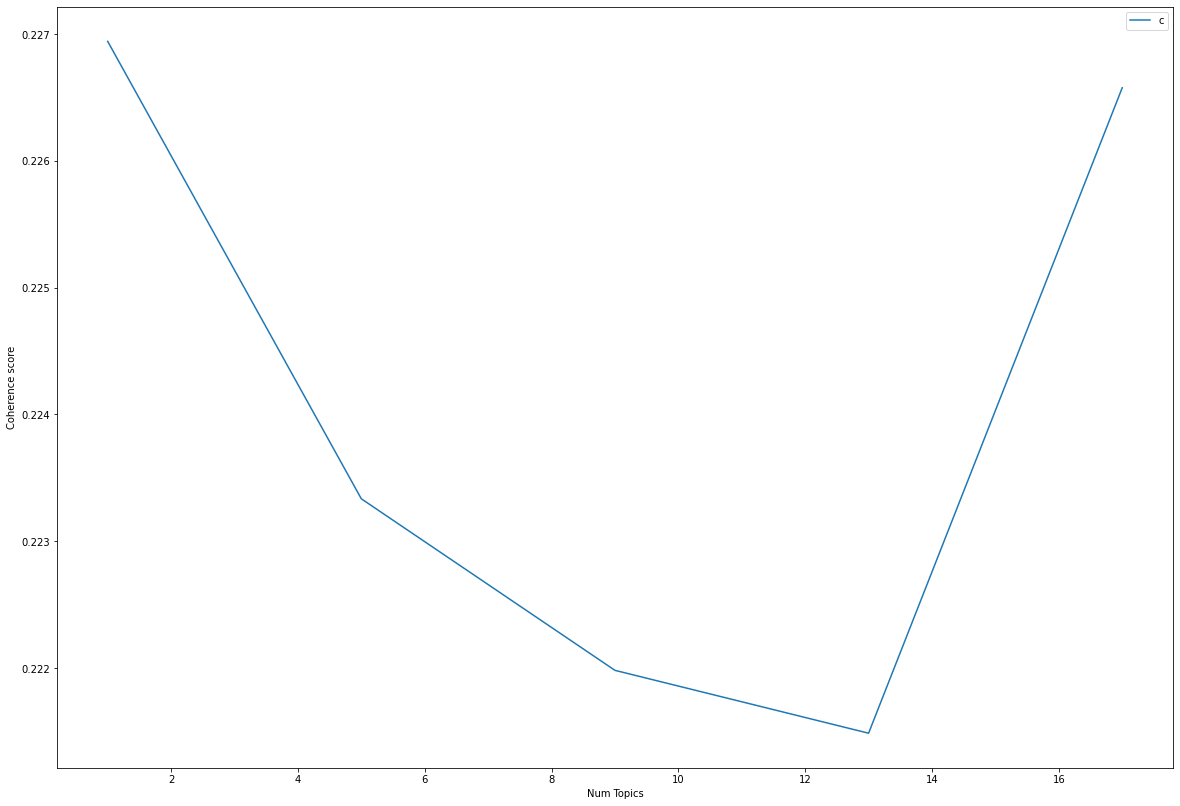

In [46]:
# Show graph
plt.rcParams['figure.figsize'] = [20, 14]
limit=20; start=1; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [47]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 2))

Num Topics = 1  has Coherence Value of 0.23
Num Topics = 5  has Coherence Value of 0.22
Num Topics = 9  has Coherence Value of 0.22
Num Topics = 13  has Coherence Value of 0.22
Num Topics = 17  has Coherence Value of 0.23


In [48]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.012*"hungary" + 0.009*"hungarian" + 0.008*"country" + 0.006*"year" + '
  '0.006*"government" + 0.005*"people" + 0.005*"city" + 0.004*"europe" + '
  '0.004*"mean" + 0.004*"world"'),
 (1,
  '0.012*"hungary" + 0.011*"country" + 0.009*"hungarian" + 0.009*"europe" + '
  '0.005*"world" + 0.005*"european" + 0.005*"people" + 0.005*"today" + '
  '0.004*"government" + 0.004*"year"'),
 (2,
  '0.017*"hungarian" + 0.011*"hungary" + 0.009*"country" + 0.008*"people" + '
  '0.007*"europe" + 0.006*"year" + 0.006*"world" + 0.005*"new" + '
  '0.005*"future" + 0.004*"today"'),
 (3,
  '0.014*"hungarian" + 0.010*"hungary" + 0.007*"europe" + 0.007*"country" + '
  '0.007*"people" + 0.006*"year" + 0.005*"national" + 0.005*"government" + '
  '0.004*"world" + 0.004*"today"'),
 (4,
  '0.013*"hungarian" + 0.010*"people" + 0.009*"country" + 0.009*"hungary" + '
  '0.008*"europe" + 0.005*"government" + 0.005*"world" + 0.005*"today" + '
  '0.005*"national" + 0.005*"live"'),
 (5,
  '0.011*"government" + 0.010

###### Finding   the Dominant topic and its percentage contribution in each document

In [49]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,13.0,0.9046,"hungarian, country, people, hungary, world, eu...","“Together,” Orban said, “we have transformed a..."
1,1,17.0,0.9994,"hungarian, hungary, people, country, world, eu...","25 July 2015, Tusnádfürdő (Băile Tuşnad) Good ..."
2,2,8.0,0.5471,"hungarian, hungary, europe, country, people, y...","15 March 2018, Budapest I welcome you all on H..."
3,3,14.0,0.7979,"europe, hungary, hungarian, country, people, w...","12 November 2017, Budapest Dear Friends, Guest..."
4,4,14.0,0.9537,"europe, hungary, hungarian, country, people, w...","Budapest, 26 January 2018 Good day to you all,..."
5,5,13.0,0.8862,"hungarian, country, people, hungary, world, eu...","6 April 2018, Székesfehérvár Ladies and Gentle..."
6,6,17.0,0.6566,"hungarian, hungary, people, country, world, eu...","Budapest, 10 May 2018 Honourable President of ..."
7,7,6.0,0.9886,"hungarian, hungary, year, people, government, ...","6 March 2018, Budapest Good morning, Ladies an..."
8,8,17.0,0.9992,"hungarian, hungary, people, country, world, eu...","16 February 2018, Budapest A respectful welcom..."
9,9,17.0,0.9994,"hungarian, hungary, people, country, world, eu...","8 February 2018, Veszprém Good morning, Ladies..."


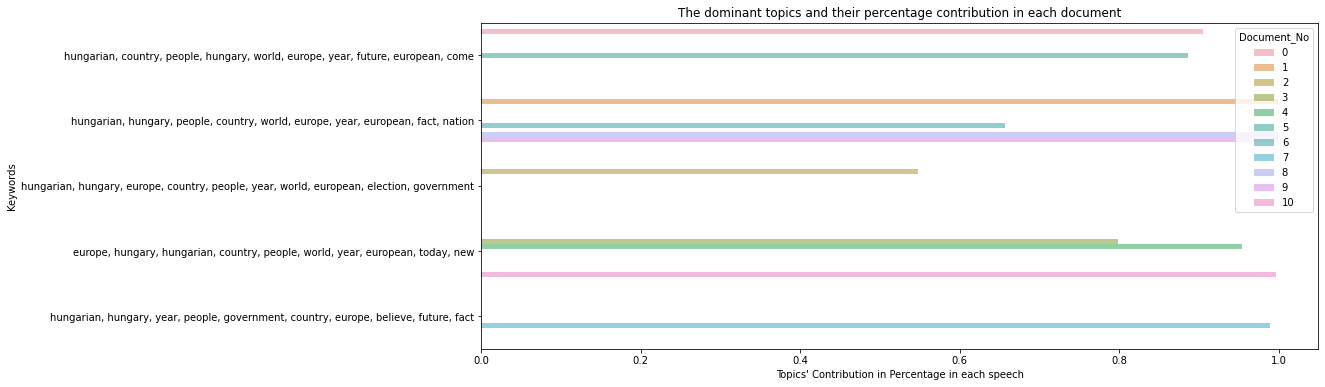

In [50]:

#ploting the Total count of bikes rented duriung each hour (per day)
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(y='Keywords',  x='Topic_Perc_Contrib', hue='Document_No', data=df_dominant_topic, alpha=0.6).set(title='The dominant topics and their percentage contribution in each document', ylabel='Keywords', xlabel= "Topics' Contribution in Percentage in each speech")
None

##### Find the most representative words for each topic

In [51]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet= pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,6.0,0.9886,"hungarian, hungary, year, people, government, country, europe, believe, future, fact","6 March 2018, Budapest Good morning, Ladies and Gentlemen,There isn’t much meat left on the bone..."
1,8.0,0.5471,"hungarian, hungary, europe, country, people, year, world, european, election, government","15 March 2018, Budapest I welcome you all on Hungary celebration of freedom! I greet those takin..."
2,13.0,0.9046,"hungarian, country, people, hungary, world, europe, year, future, european, come","“Together,” Orban said, “we have transformed and renewed the country. Together we have modernize..."
3,14.0,0.9963,"europe, hungary, hungarian, country, people, world, year, european, today, new","5 September 2015 Kötcse - Edited version Ladies and Gentlemen,Forgive me if my speech today is s..."
4,17.0,0.9994,"hungarian, hungary, people, country, world, europe, year, european, fact, nation","25 July 2015, Tusnádfürdő (Băile Tuşnad) Good morning,Allow me to welcome attendees at the open ..."


[Text(0.5, 1.0, 'The most representative words for each topic'),
 Text(0, 0.5, 'Keywords'),
 Text(0.5, 0, "Topics' Contribution in Percentage")]

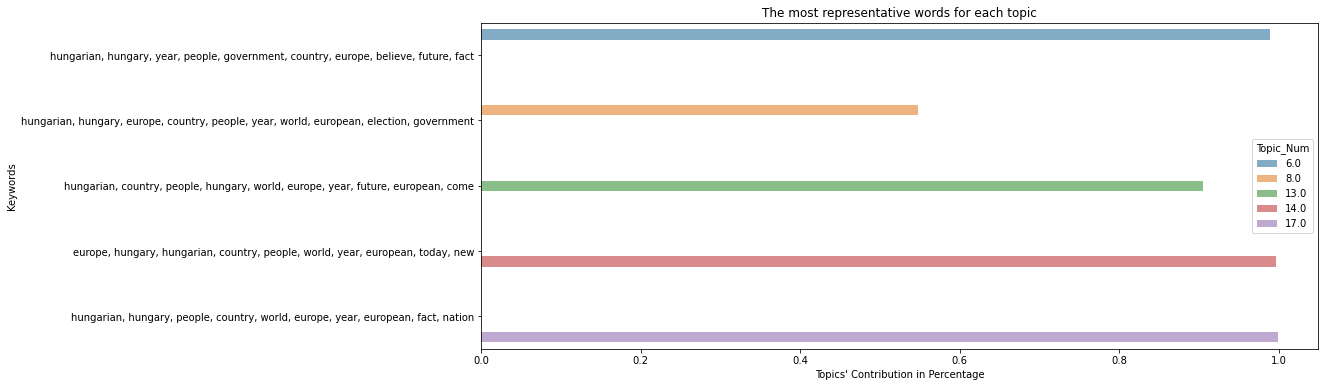

In [52]:

#ploting the Total count of bikes rented duriung each hour (per day)
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(y='Keywords',  x='Topic_Perc_Contrib', hue='Topic_Num', data=sent_topics_sorteddf_mallet, alpha=0.6).set(title='The most representative words for each topic', ylabel='Keywords', xlabel= "Topics' Contribution in Percentage")

In [53]:
plt.savefig('save_as_a_png3.png')

<Figure size 1440x1008 with 0 Axes>

##### Topic distribution across documents

In [54]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,13.0,"hungarian, country, people, hungary, world, europe, year, future, european, come",NaN,NaN
1.0,17.0,"hungarian, hungary, people, country, world, europe, year, european, fact, nation",NaN,NaN
2.0,8.0,"hungarian, hungary, europe, country, people, year, world, european, election, government",NaN,NaN
3.0,14.0,"europe, hungary, hungarian, country, people, world, year, european, today, new",NaN,NaN
4.0,14.0,"europe, hungary, hungarian, country, people, world, year, european, today, new",NaN,NaN
5.0,13.0,"hungarian, country, people, hungary, world, europe, year, future, european, come",NaN,NaN
6.0,17.0,"hungarian, hungary, people, country, world, europe, year, european, fact, nation",1.0,0.0909
7.0,6.0,"hungarian, hungary, year, people, government, country, europe, believe, future, fact",NaN,NaN
8.0,17.0,"hungarian, hungary, people, country, world, europe, year, european, fact, nation",1.0,0.0909
9.0,17.0,"hungarian, hungary, people, country, world, europe, year, european, fact, nation",NaN,NaN


###### Word Clouds of Top N Keywords in Each Topic

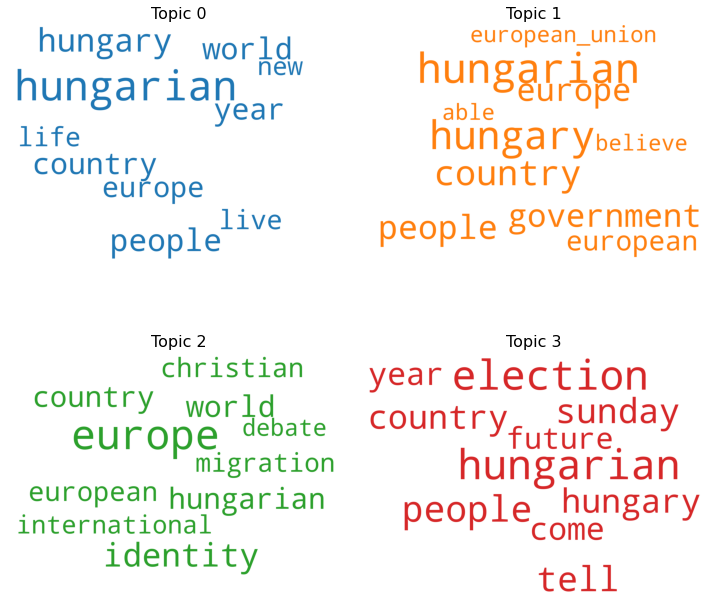

In [55]:
import matplotlib.colors as mcolors
# 1. Wordcloud of Top N words in each topic

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=25,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

##### Word Counts of Topic Keywords

<ipython-input-56-630b73cc966c>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


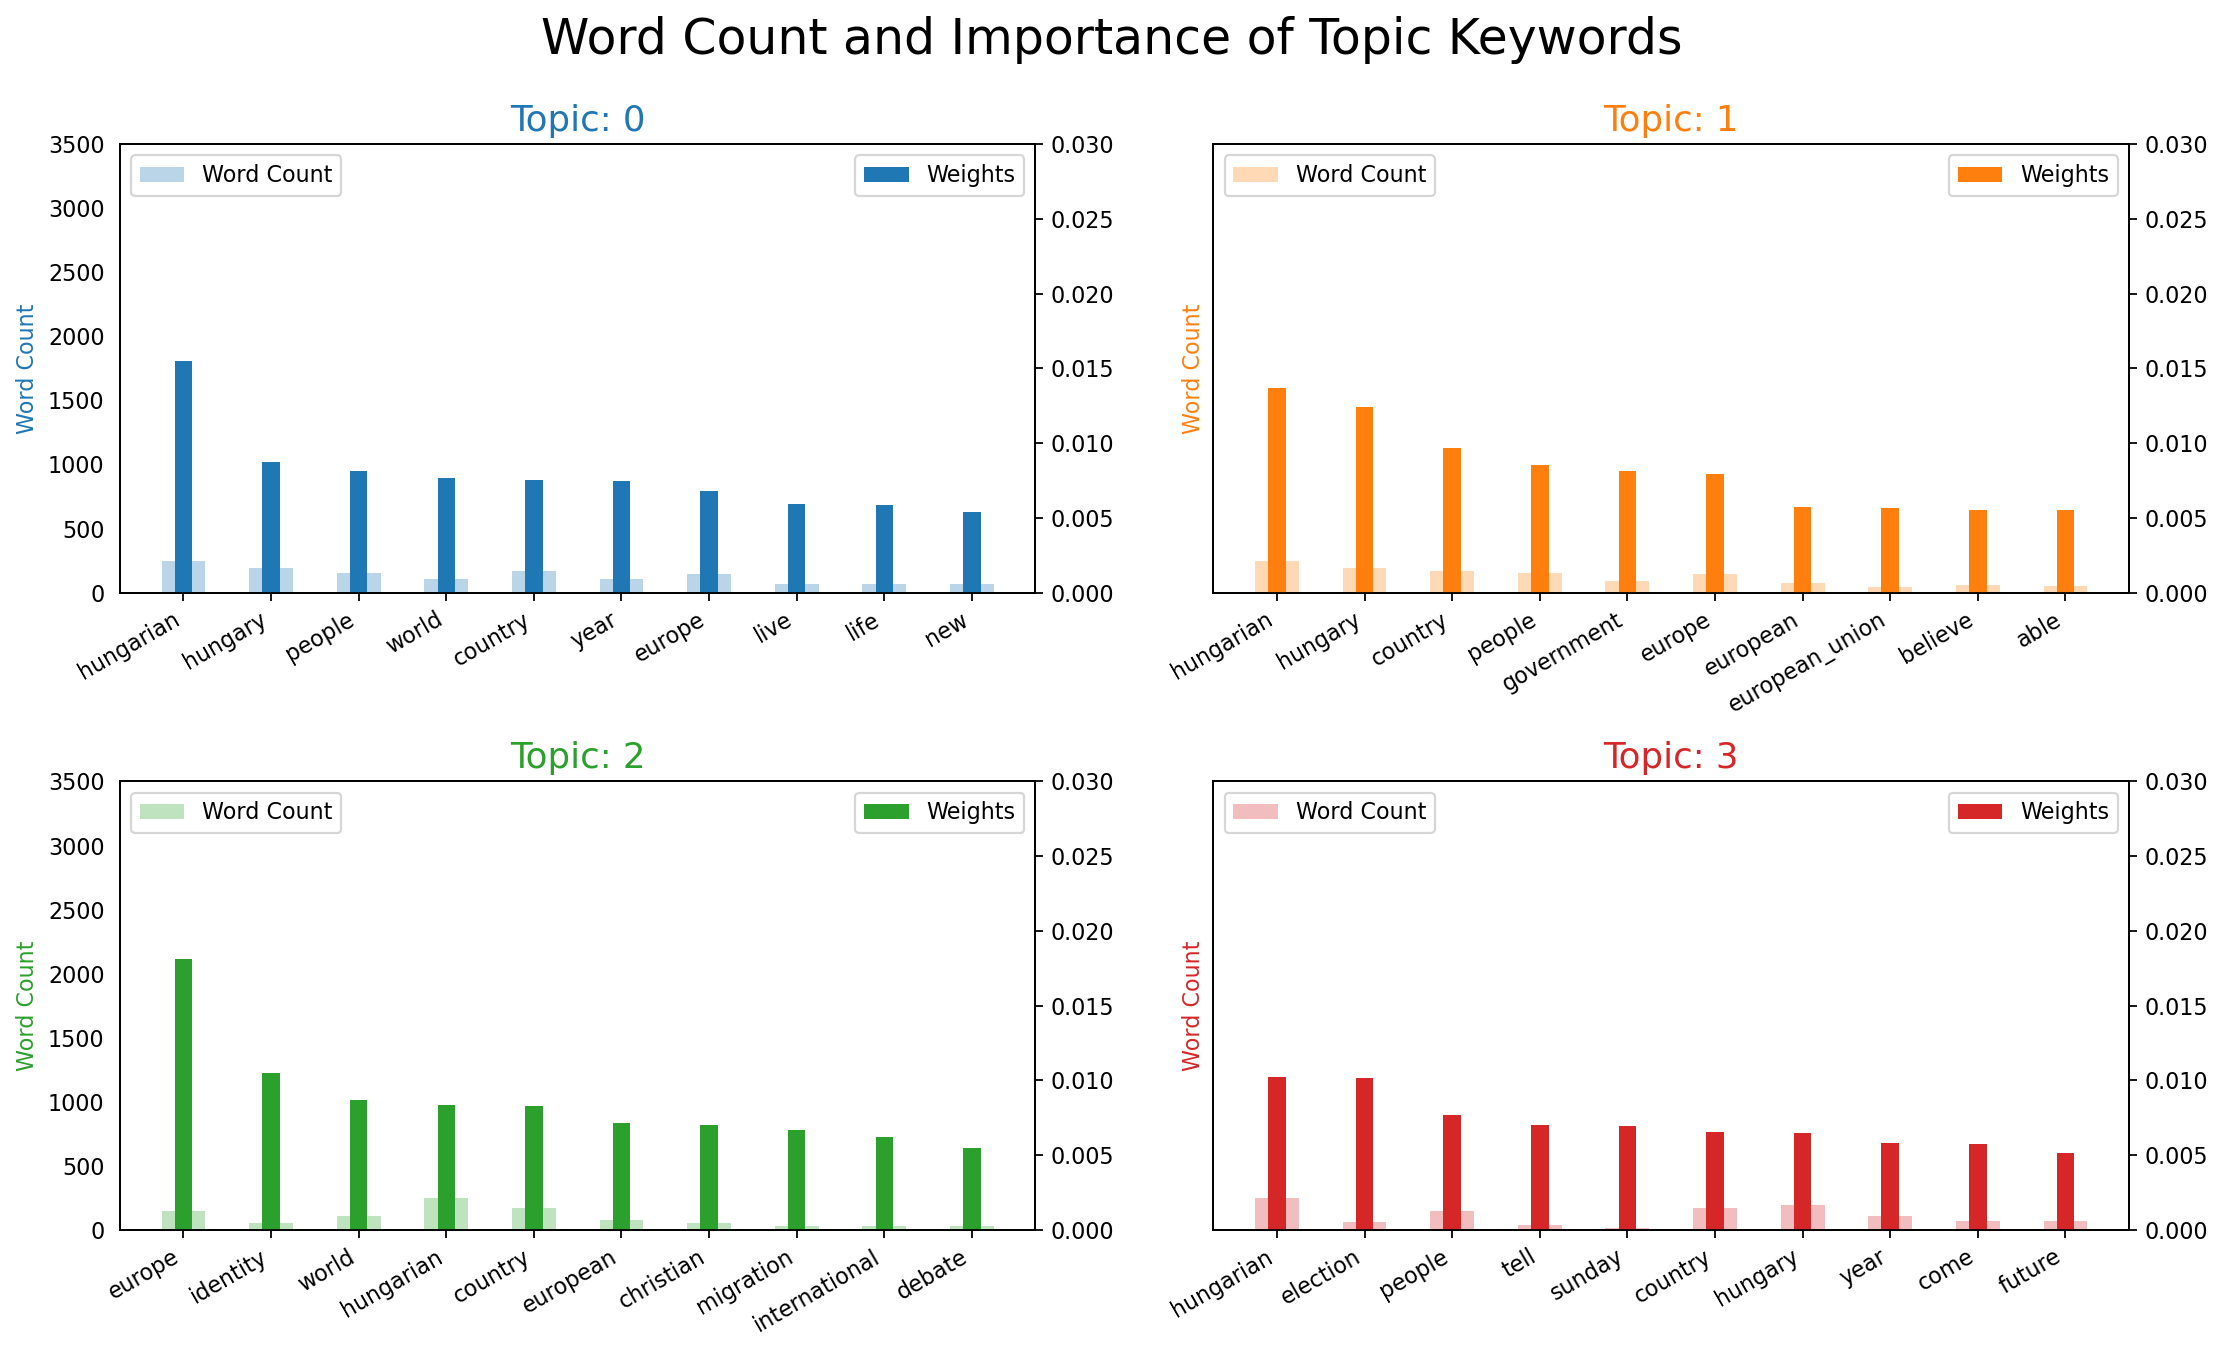

In [56]:
from collections import Counter

topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(14,8), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

##### Sentence Chart Colored by Topic

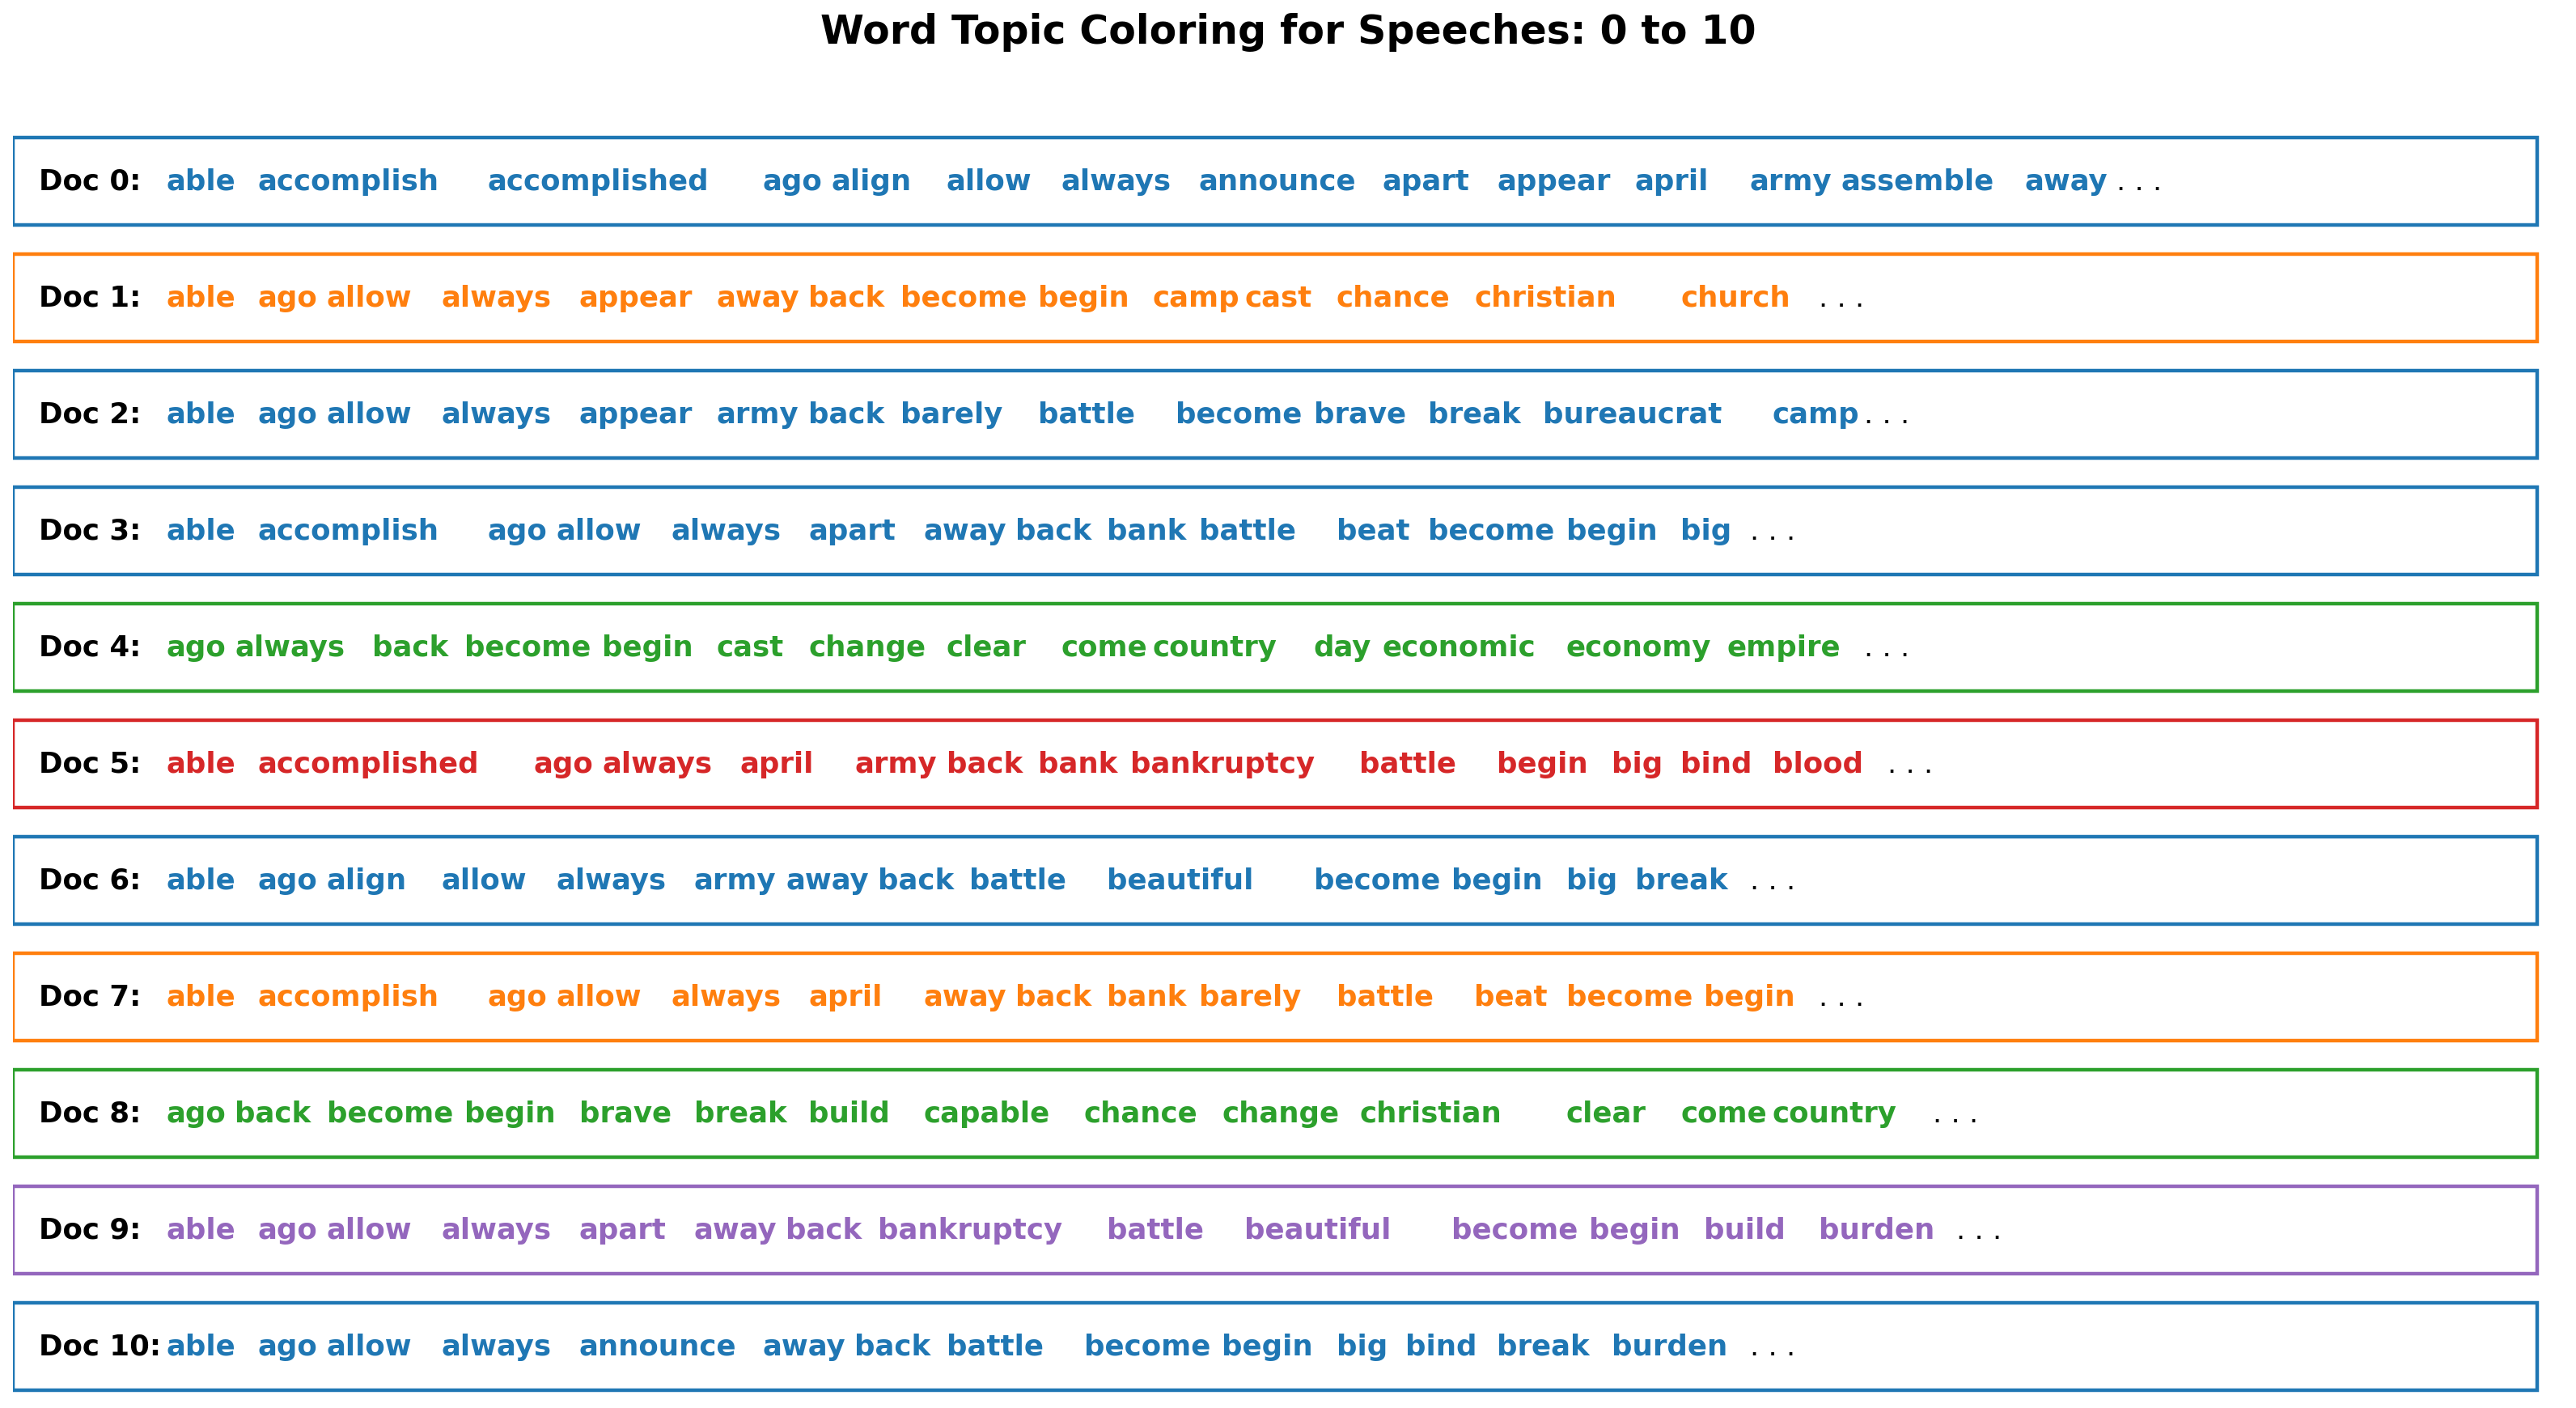

In [57]:
# Word Coloring of N Words
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 12):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Word Topic Coloring for Speeches: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

##### What are the most discussed topics in the documents?

In [58]:
# Word Coloring of N Word
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

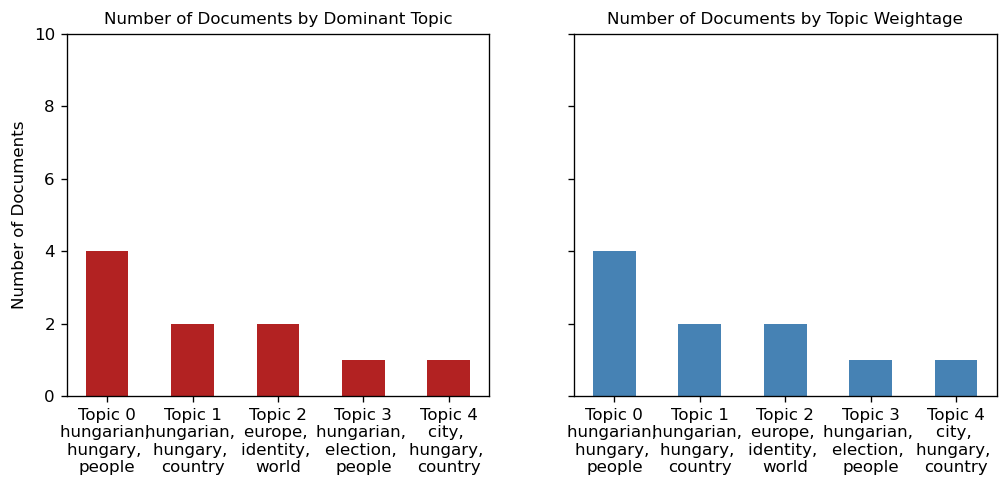

In [59]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 10)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()